In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/Admin/Documents/ML/NCHS.csv')
data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313.0,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294.0,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214.0,44.8
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287.0,47.6
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198.0,28.7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15028 entries, 0 to 15027
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     15028 non-null  int64  
 1   113 Cause Name           15028 non-null  object 
 2   Cause Name               15028 non-null  object 
 3   State                    15028 non-null  object 
 4   Deaths                   15013 non-null  float64
 5   Age-adjusted Death Rate  14917 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 704.6+ KB


In [4]:
data.columns

Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')

In [5]:
data.index

RangeIndex(start=0, stop=15028, step=1)

In [6]:
data.isnull().sum()

Year                         0
113 Cause Name               0
Cause Name                   0
State                        0
Deaths                      15
Age-adjusted Death Rate    111
dtype: int64

In [8]:
data.dropna(inplace = True)
data

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313.0,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294.0,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214.0,44.8
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287.0,47.6
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198.0,28.7
...,...,...,...,...,...,...
15023,2015,Septicemia (A40-A41),Septicemia,Virginia,1187.0,13.0
15024,2015,Septicemia (A40-A41),Septicemia,Washington,501.0,6.3
15025,2015,Septicemia (A40-A41),Septicemia,West Virginia,348.0,13.9
15026,2015,Septicemia (A40-A41),Septicemia,Wisconsin,517.0,7.2


<AxesSubplot:>

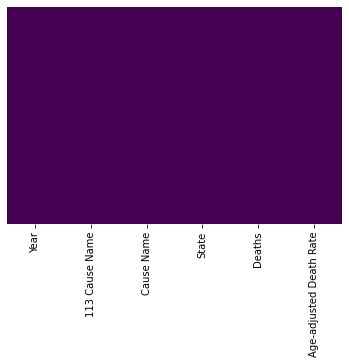

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
data.drop(data[data['Cause Name'] == 'All Causes'].index, inplace = True) 
data.shape

(14033, 6)

In [14]:
data['Cause Name'].unique()

array(['Unintentional Injuries', "Alzheimer's disease", 'Homicide',
       'Stroke', 'Chronic liver disease and cirrhosis', 'CLRD',
       'Diabetes', 'Diseases of Heart',
       'Essential hypertension and hypertensive renal disease',
       'Influenza and pneumonia', 'Cancer', 'Suicide', 'Kidney Disease',
       "Parkinson's disease", 'Pneumonitis due to solids and liquids',
       'Septicemia'], dtype=object)

In [20]:
print(' The number of deaths in the United States from 1999 to 2015 is: ', data.loc[data['State'] != 'United States',['Deaths']].sum())

 The number of deaths in the United States from 1999 to 2015 is:  Deaths    34638742.0
dtype: float64


In [22]:
a = data.groupby(['Year']).sum()
a

,Deaths,Age-adjusted Death Rate
Year,,
1999,4052876.0,38550.3
2000,4054097.0,38136.3
2001,4063971.0,37645.3
2002,4104796.0,37503.0
2003,4097245.0,36904.3
2004,3999321.0,35359.7
2005,4062908.0,35368.7
2006,3990647.0,34113.0
2007,3979212.0,33405.3


Text(0, 0.5, 'Number of Deaths')

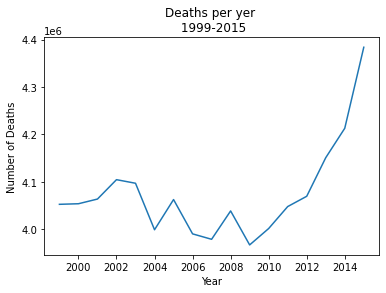

In [24]:
a['Deaths'].plot(title = 'Deaths per year \n 1999-2015')
plt.ylabel('Number of Deaths')

In [29]:
state_data = data[data['State'] != 'United States']
state_data1 = state_data.groupby(['State']).sum()
state_data1.sort_values('Deaths',ascending =False, inplace =True)
state_data1.head(10)

,Year,Deaths,Age-adjusted Death Rate
State,,,
California,545904,3422459.0,10101.2
Florida,545904,2397507.0,10156.8
Texas,545904,2270961.0,11339.7
New York,545904,2170019.0,10226.5
Pennsylvania,545904,1785982.0,11334.1
Ohio,545904,1529552.0,11931.3
Illinois,545904,1460489.0,11170.8
Michigan,545904,1248155.0,11645.7
North Carolina,545904,1063835.0,11737.3


<AxesSubplot:title={'center':'Top 10 states with the highest deaths'}, xlabel='State'>

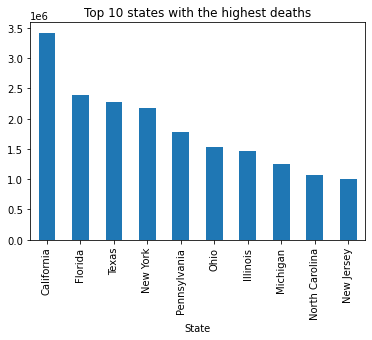

In [30]:
state_data1['Deaths'].head(10).plot.bar(title = 'Top 10 states with the highest deaths')

Text(0, 0.5, 'Number of Deaths')

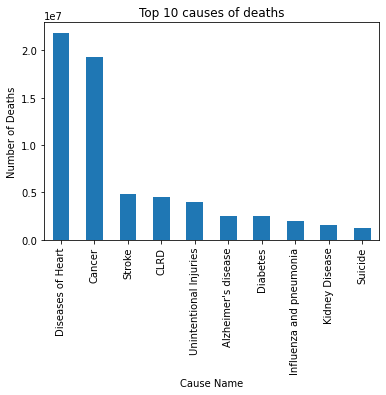

In [34]:
state_data = data.groupby(['Cause Name']).sum()
state_data.sort_values('Deaths', ascending = False, inplace =True)
state_data['Deaths'].head(10).plot.bar(title = 'Top 10 causes of deaths')
plt.ylabel('Number of Deaths')